Aim
================================================================================
The aim of this notebook is to familiarize yourself with linear dimensionality techniques applied on medical data. More precisely, in this notebook we are going to work with the famous Wisconsin breast cancer dataset.

First, we are going to perform exploratory data analysis. Subsequently, we will apply four linear dimensionality reduction techniques:
1. Principal Component Analysis
2. Singular Value Decomposition
3. Linear Discriminative Analysis


IMPORTANT NOTE!! Please note in this notebook we will treat data as if they were all training data. Fitting (also applies for any pre-processing steps such as imputing, scaling etc) should only be done using the training data. The testing set should never been seen so it cannot be used during fitting. The testing data should be transformed using the fitted model.


Data set information
================================================================================
Dataset for the diagnosis of breast cancer (Malignant or Benign encoded as 0 and 1, repectively) based on a set of features computed from digitized images of a fine needle aspirate (FNA) of a breast mass describing the characteristics of cell nuclei:
1. Radius calculated as the mean of distances from center to points on the perimeter
2. Texture calculated as the standard deviation of gray-scale values
3. Perimeter
4. Area
5. Smoothness calculated as the local variation in radius lengths
6. Compactness calculated as perimeter² / area — 1.0
7. Concavity calculated as the severity of concave portions of the contour
8. Concave points calculated as number of concave portions of the contour
9. Symmetry
10. Fractal dimension calculated using "coastline approximation" - 1

For each of the features  the mean, standard error (SE) and “worst” or largest (mean of the three largest values) were calculated, resulting in a total of 30 features available for each sample/image.

All features are numerical.

The output clases, ie. potential diagnosis, are two:
1. Bening encoded as 1
2. Malignant encoded as 0

The original dataset can be found at https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Author: Polyxeni Gkontra, Machine Learning for Precision Medicine course, MBDS, 2024


Import necessary libraries: [pandas](https://pandas.pydata.org/docs/index.html), [seaborn](https://seaborn.pydata.org/index.html), [matplotlib.pyplot](https://matplotlib.org/stable/tutorials/introductory/pyplot.html), [matplotlib.ticker](https://matplotlib.org/stable/api/ticker_api.html), [numpy](https://numpy.org)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MaxNLocator

Load the dataset
======================================================

Load the dataset using [load_breast_cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) from sklearn.datasets. Create a dataframe with name "data" that contains at each row a sample and each column a features and a dataframe "y" that contains the output class, i.e. the diagnosis (one row per sample).

In [7]:
from sklearn.datasets import load_breast_cancer

# Load the dataset and add to pandas
breast_cancer = load_breast_cancer()
# Convert dataset to pandas dataframe
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
y = pd.DataFrame(breast_cancer.target, columns=['Diagnosis'])

#Alternative: Read directly into dataframes
breast_cancer = load_breast_cancer( return_X_y=True, as_frame=True)
data, y_array = load_breast_cancer( return_X_y=True, as_frame=True)
y = y_array.to_frame('Diagnosis')

Exploratory Data Analysis
================================================================================

Print the first 5 lines or the last 5. Useful functions in this respect: [head](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) and [tail](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html)  

In [8]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Check the type of the data in the different columns or, more general, get the statistics summary for the dataframe with the features. Useful functions for such exporations using dataframes: [describe()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html), [info()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html), [dtypes](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

In [9]:
# Check the type of each column
print("The types of the different columns are: \n", data.dtypes)
# Check summary statistics
print(data.describe())
# Print a summary of the dataframe
data.info(verbose=True)

The types of the different columns are: 
 mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave

Print the name of the columns and the size of the dataframe data to see the number of samples and features. Check the size of the y dataframe too. Useful functions/properties: [shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html), [columns](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html)

In [10]:
# Print the names of the columns
print("The names of the columns are: ", data.columns)
# Print the size of the dataframe containing the features
print("The size of the dataframe data is: ", data.shape)
# Print the size of the dataframe containing the target classes
print("The size of the dataframe y is: ", y.shape)

The names of the columns are:  Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')
The size of the dataframe data is:  (569, 30)
The size of the dataframe y is:  (569, 1)


Check for NaN, unknown or  null values in the feature dataframe: [null](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)

In [11]:
data.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

Verify that all columns are numerical columns: _get_numeric_data()

In [12]:
data._get_numeric_data()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


Verify the number of output classes and their names. Finally, create a plot thats shows the counts of each class. Useful function: [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) from the [seaborn library](https://seaborn.pydata.org/index.html)

The unique classes of the dataset are:  [0 1]
The number of classes is:  2
The number of samples in each category is:  Diagnosis
1            357
0            212
Name: count, dtype: int64


C:\Users\csanchez\AppData\Local\Temp\ipykernel_15768\743814444.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  y['Diagnosis'].replace(1, 'Benign', inplace=True)


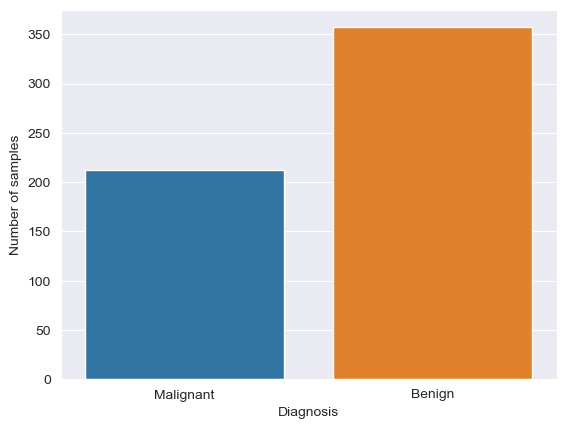

In [8]:
# Get the unique values of dataframe y
classes = y['Diagnosis'].unique()
# Print the classes and their number
print("The unique classes of the dataset are: ", classes)
print("The number of classes is: ", classes.size)
print("The number of samples in each category is: ", y.value_counts())
# Replace the 0,1 with Bening and Malignant
y['Diagnosis'].replace(1, 'Benign', inplace=True)
y['Diagnosis'].replace(0, 'Malignant', inplace=True)
# Create the countplot
ax = sns.countplot(data = y, x = 'Diagnosis', hue = 'Diagnosis')
ax.set(ylabel = 'Number of samples');
#ax.set_xticklabels(['Malignant', 'Benign'])

Visualize the relationship between features and output class using [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) from the [seaborn library](https://seaborn.pydata.org/index.html). Initally, focus just on the features corresponding to mean values, ignoring the standard error (se) and worst features. You can experiment with se and worst on your own following the same approach. Please note that if you add all features at once, it will take a while for the visualization to be completed

In [9]:
# Create a common dataframe from input and output dataframes
all_data = pd.concat([data, y], axis=1)
all_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,Malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,Malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,Malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,Malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,Malignant


In [15]:
# Create a list with the features of interest and diagnosis
list_mean = ['mean radius',	'mean texture',	'mean perimeter',	'mean area',	'mean smoothness',	'mean compactness',	'mean concavity',	'mean concave points',	'mean symmetry',	'mean fractal dimension', 'Diagnosis'];
# Keep only the features of interest
mean_data = all_data[list_mean];

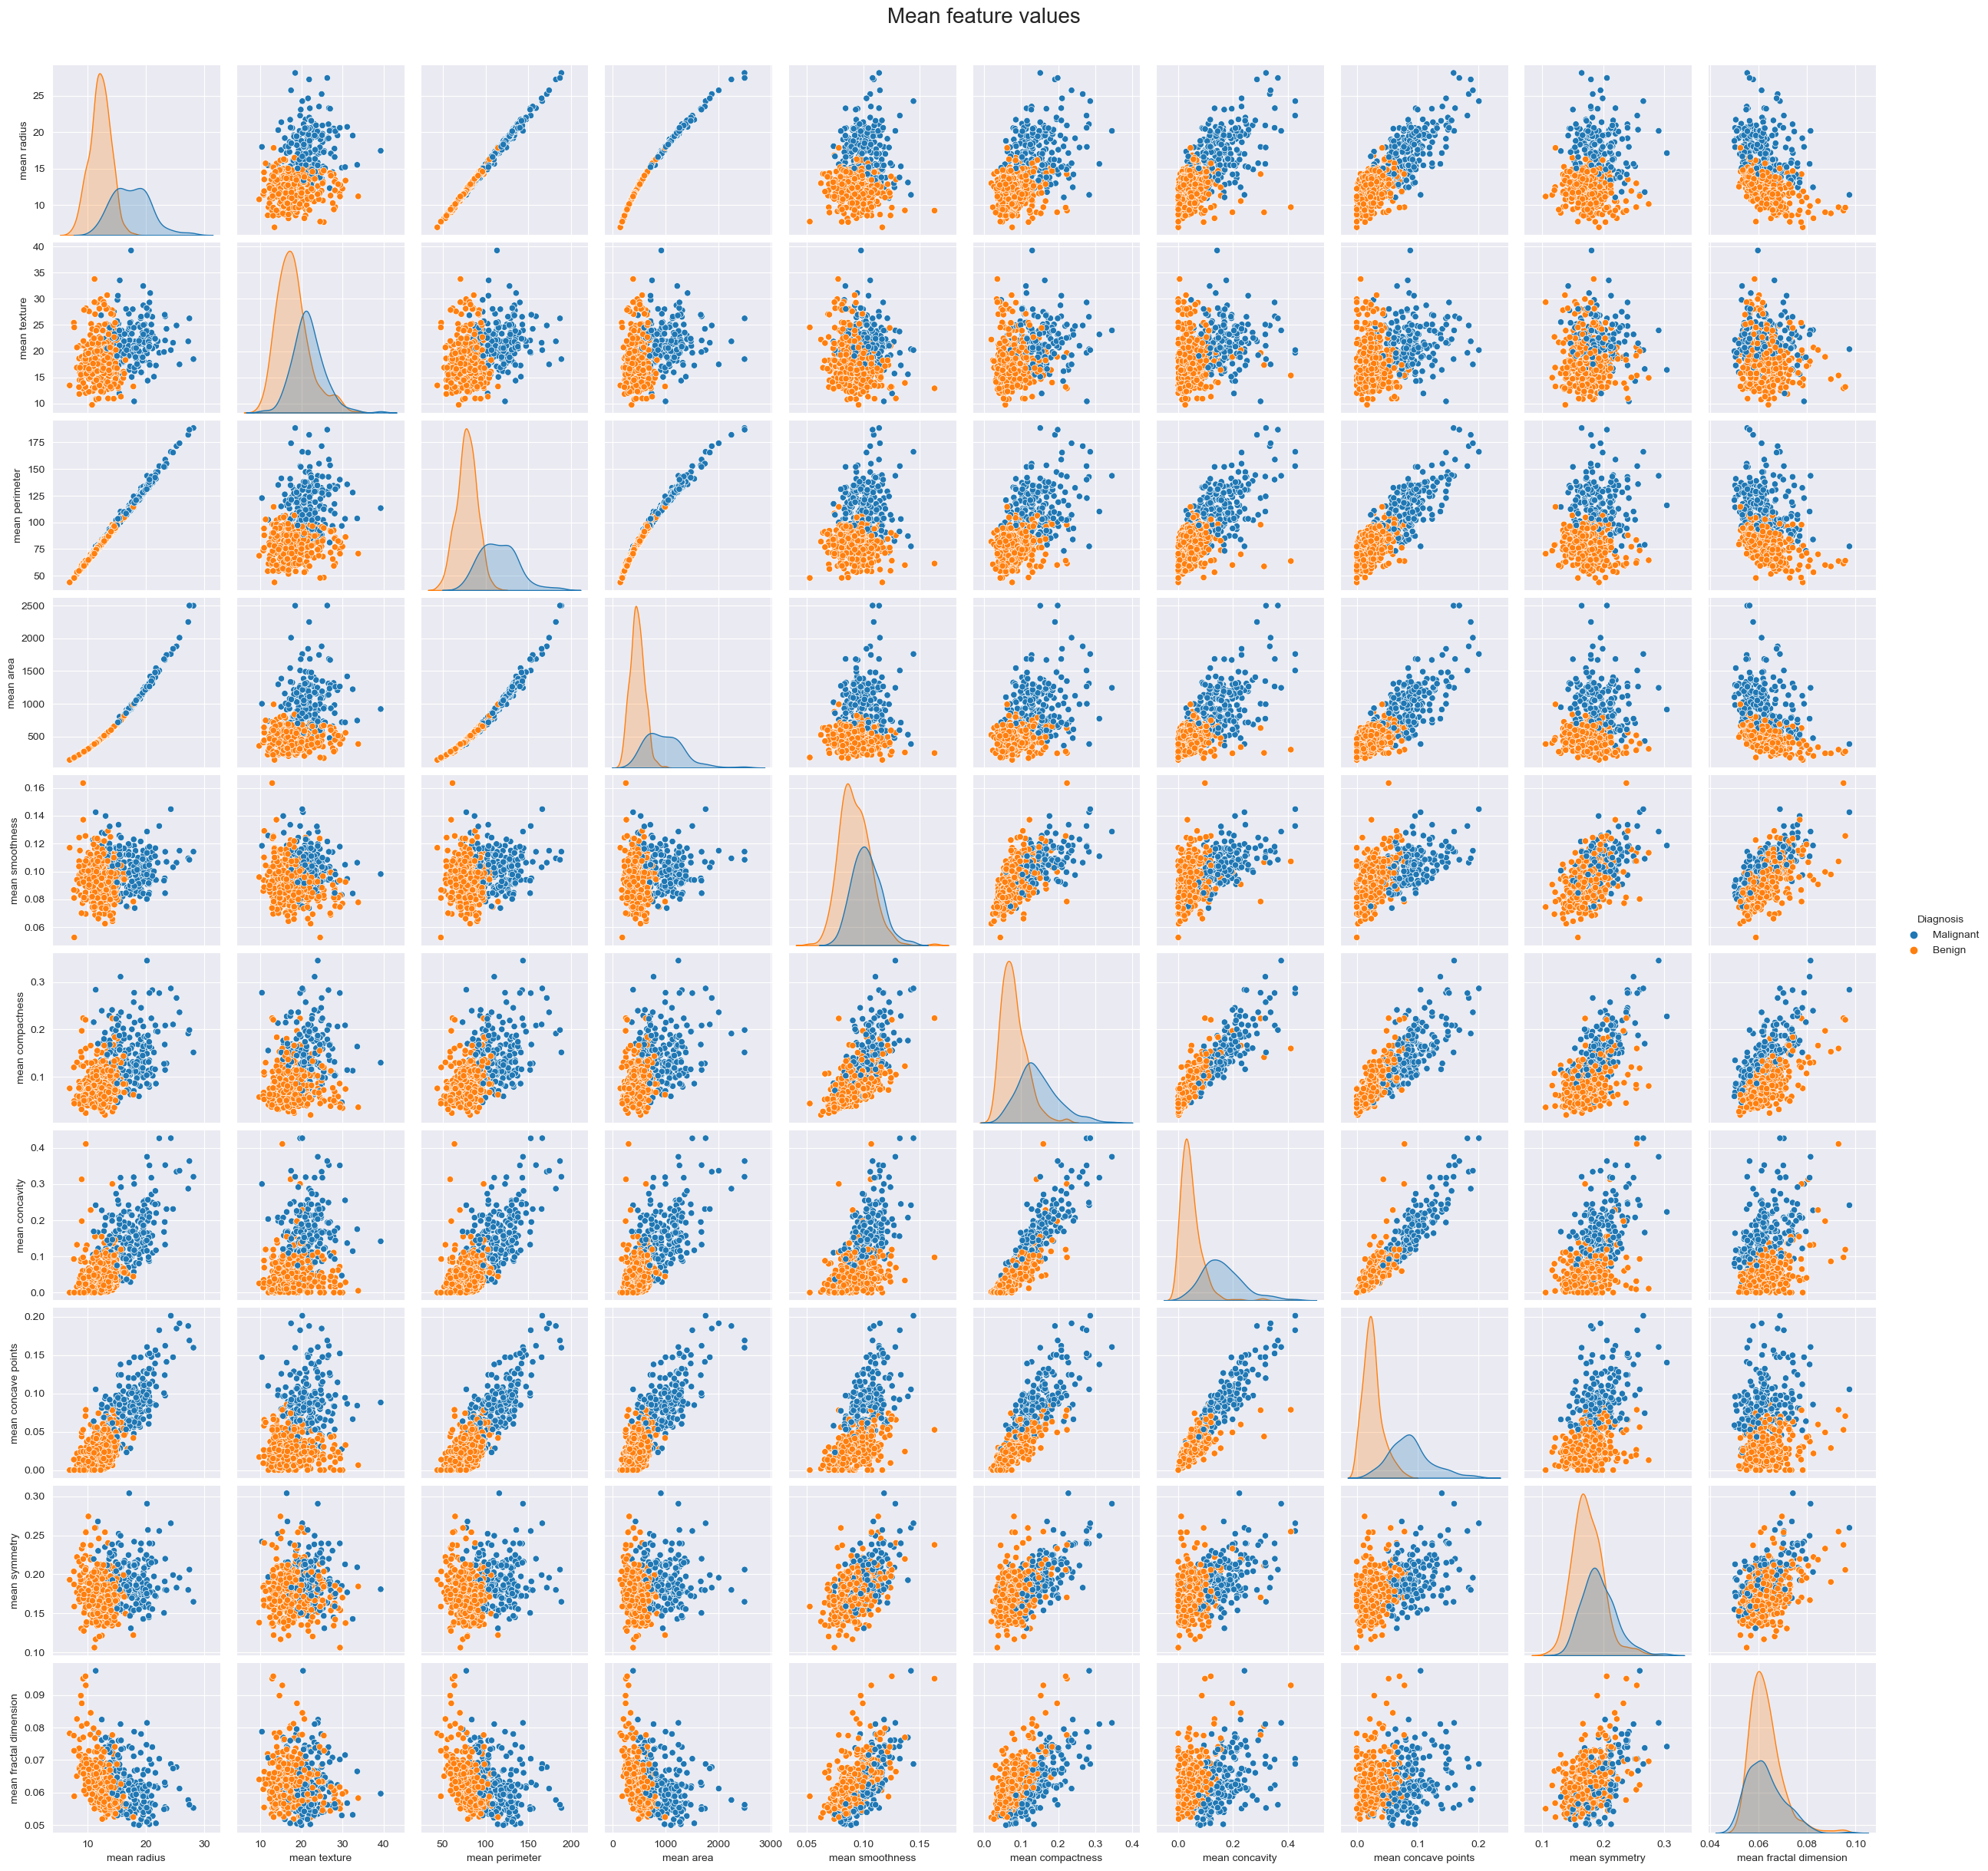

In [16]:
# Create the pairplot
ax = sns.pairplot(mean_data, hue = 'Diagnosis')
ax.fig.suptitle('Mean feature values', fontsize = 20)
ax.fig.subplots_adjust(top = 0.95);

Calculate the Pearson correlation (Check out [corr](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html)) between all features (mean, se, worst) and plot the correlation as a heatmap (Check out [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from seaborn)

                 mean radius  mean texture  mean perimeter  mean area  \
mean radius         1.000000      0.323782        0.997855   0.987357   
mean texture        0.323782      1.000000        0.329533   0.321086   
mean perimeter      0.997855      0.329533        1.000000   0.986507   
mean area           0.987357      0.321086        0.986507   1.000000   
mean smoothness     0.170581     -0.023389        0.207278   0.177028   

                 mean smoothness  mean compactness  mean concavity  \
mean radius             0.170581          0.506124        0.676764   
mean texture           -0.023389          0.236702        0.302418   
mean perimeter          0.207278          0.556936        0.716136   
mean area               0.177028          0.498502        0.685983   
mean smoothness         1.000000          0.659123        0.521984   

                 mean concave points  mean symmetry  mean fractal dimension  \
mean radius                 0.822529       0.147741          

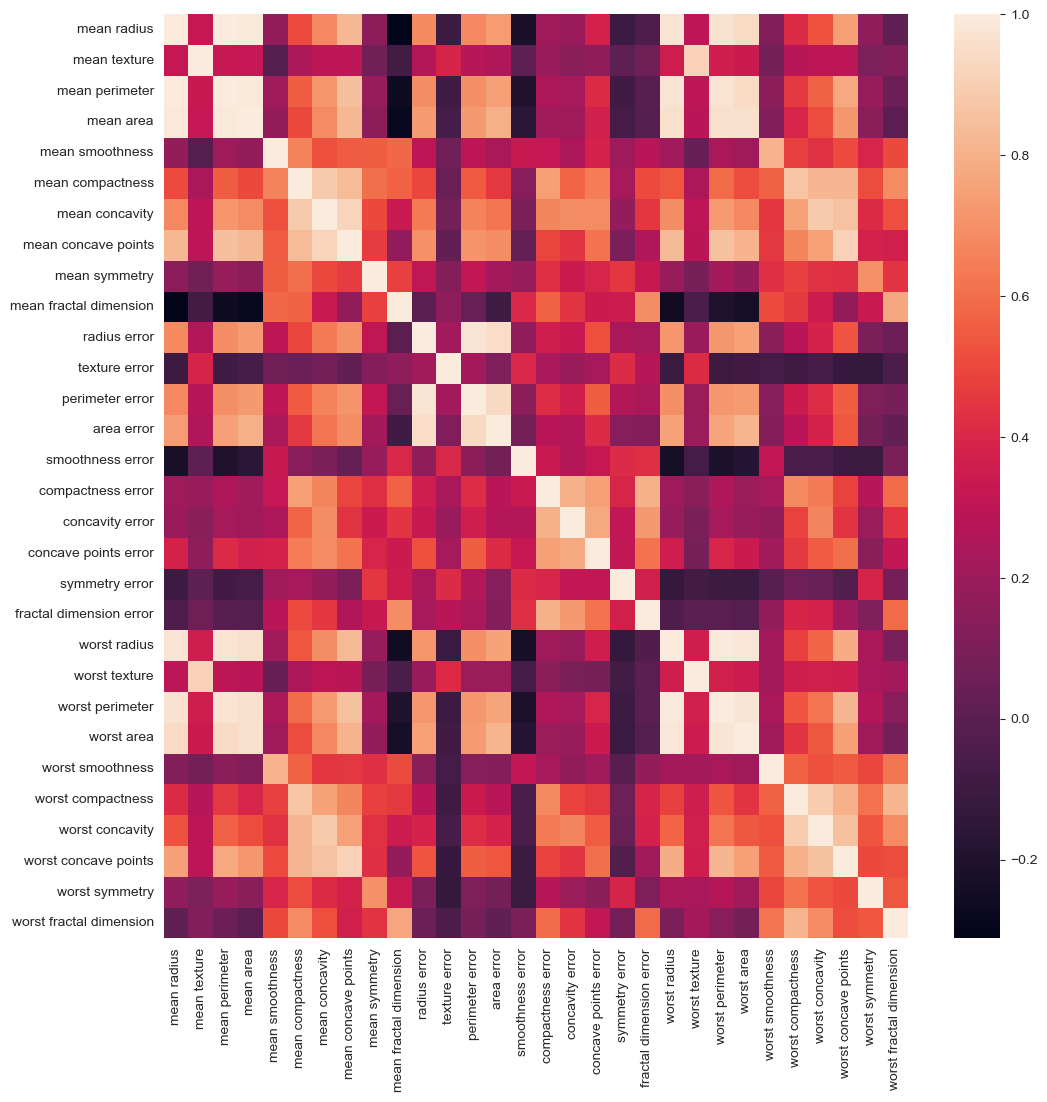

In [17]:
# Calculate correlation between features
data_corr = data.corr()
# Print the first 5 rows of the correlation dataframe
print(data_corr.head())
# Plot a heatmap with the correlations
plt.figure(figsize=(12, 12))
sns.heatmap(data_corr, xticklabels=True, yticklabels=True);

Principal component analysis
================================================

Load relevant libraries

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

**Data pre-processing**

PCA finds a smaller number of uncorrelated features from a larger initial set of correlated features. To this aim, PCA calculates linear combinations of the correlated features that maximize the variance.

The first step before performing PCA is to scale/standardize the features. If the features are not scaled, then those of them with higher scale will be considered as varying more and would dominate the direction of the principal components.

Standardize the features by removing the mean and scaling to unit variance. Useful: [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from sklearn

Helpful links:
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html#effect-of-rescaling-on-a-pca-dimensional-reduction


In [11]:
# Define the transform
scaler = StandardScaler()
# Fit and transform the data
X_scaled = scaler.fit_transform(data)

Use PCA to explain 95% of the variance. Useful class: [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from [sklearn.decomposition](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.decomposition)

In [20]:
# Define the transform
pca_scaled = PCA(n_components=0.95)
# Fit to the data
pca_scaled.fit(X_scaled)
# Transform the data
X_scaled_transformed = pca_scaled.transform(X_scaled)

Print the variance, the explained variance ratio and cumulative variance per component. In addition, create a plot with the cumulative variance versus the number of components to better understand how the number of components was choosen (Useful attributes: explained_variance_, explained_variance_ratio_, explained_variance_ratio_.cumsum())

The explained variance for each component is:  [13.30499079  5.7013746   2.82291016  1.98412752  1.65163324  1.20948224
  0.67640888  0.47745625  0.41762878  0.35131087]
The explained variance ratio per component is:  [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
The cumulative variance is:  [0.44272026 0.63243208 0.72636371 0.79238506 0.84734274 0.88758796
 0.9100953  0.92598254 0.93987903 0.95156881]


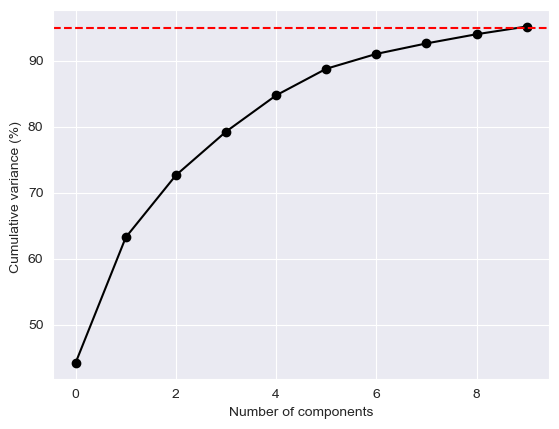

In [21]:
print("The explained variance for each component is: ", pca_scaled.explained_variance_)
print("The explained variance ratio per component is: ", pca_scaled.explained_variance_ratio_)
print("The cumulative variance is: ", pca_scaled.explained_variance_ratio_.cumsum())
# Cumulative plot
plt.plot(100*pca_scaled.explained_variance_ratio_.cumsum(), marker='o', linestyle='-', color='black')
plt.xlabel('Number of components');
plt.ylabel('Cumulative variance (%) ');
plt.axhline(95, color='red', linestyle='--');

Inspect the weight that each feature has on the first principal component.

Create a barplot of the weights for the first components. Useful: attribute components_, [plot.bar](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html) and from pandas [sort_values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) for sorting

[0.21890244 0.10372458 0.22753729 0.22099499 0.14258969 0.23928535
 0.25840048 0.26085376 0.13816696 0.06436335 0.20597878 0.01742803
 0.21132592 0.20286964 0.01453145 0.17039345 0.15358979 0.1834174
 0.04249842 0.10256832 0.22799663 0.10446933 0.23663968 0.22487053
 0.12795256 0.21009588 0.22876753 0.25088597 0.12290456 0.13178394]
                         With scaling
mean radius                  0.218902
mean texture                 0.103725
mean perimeter               0.227537
mean area                    0.220995
mean smoothness              0.142590
mean compactness             0.239285
mean concavity               0.258400
mean concave points          0.260854
mean symmetry                0.138167
mean fractal dimension       0.064363
radius error                 0.205979
texture error                0.017428
perimeter error              0.211326
area error                   0.202870
smoothness error             0.014531
compactness error            0.170393
concavity error    

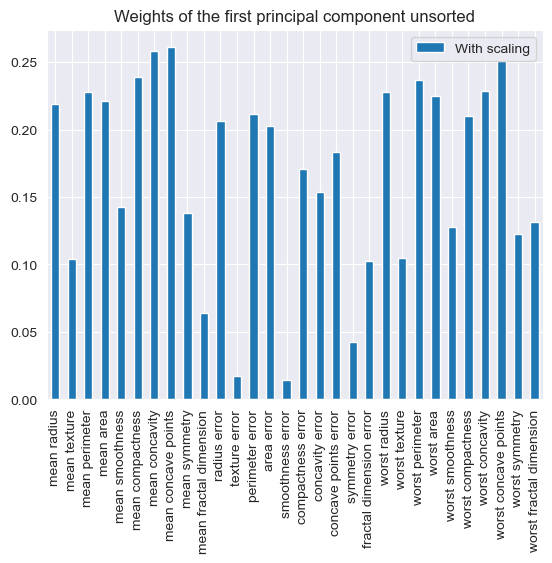

In [22]:
# Print the weights that each feature has on PC 1
comp = 0
print(pca_scaled.components_[comp])
# Assign the weights to a dataframe
first_PC = pd.DataFrame(
    pca_scaled.components_[comp], index=data.columns, columns=["With scaling"]
)
print(first_PC)
# Plot the weights
first_PC.plot.bar(
    title="Weights of the first principal component unsorted");


(30, 1)


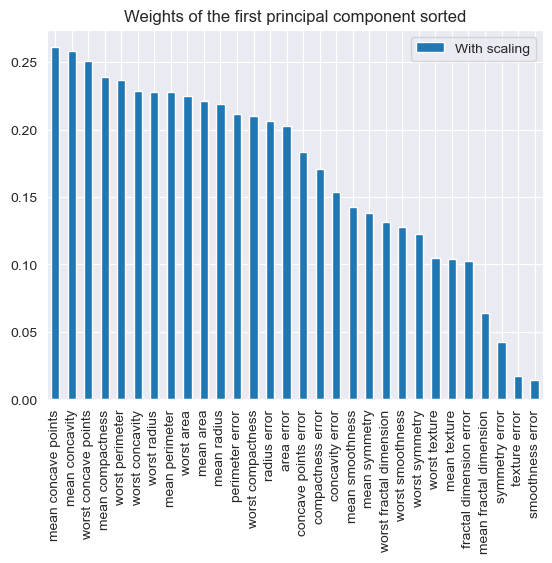

In [23]:
# Order according to descending weight
print(first_PC.shape)
first_PC_scaled_sorted = first_PC.sort_values(by = 'With scaling', ascending=False)
# Plot the sorted weights
first_PC_scaled_sorted.plot.bar(
    title="Weights of the first principal component sorted");

Repeat the above process for the second component to see the potential differences.

Check the correlation between the new features.

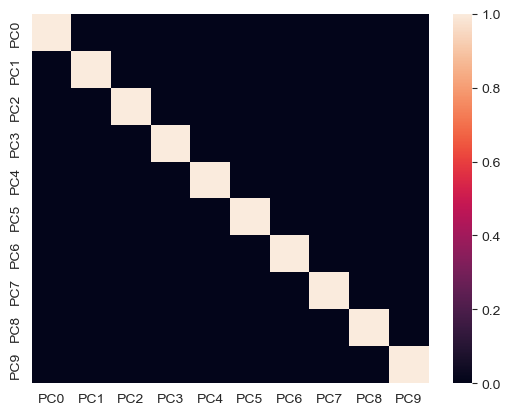

In [24]:
# Convert transformed data to dataframe
pcs_names = ['PC' + str(s) for s in range(0, X_scaled_transformed.shape[1])]
data_scaled_transf = pd.DataFrame(X_scaled_transformed, columns = pcs_names)
#Create heatmap
sns.heatmap(data_scaled_transf.corr(), xticklabels=True, yticklabels=True);

Now apply PCA on the data without having applied scaling first defining as many components as necessary for two scenarios: 1. explain 95% of variance, 2. explain 99% of variance. What do you observe?

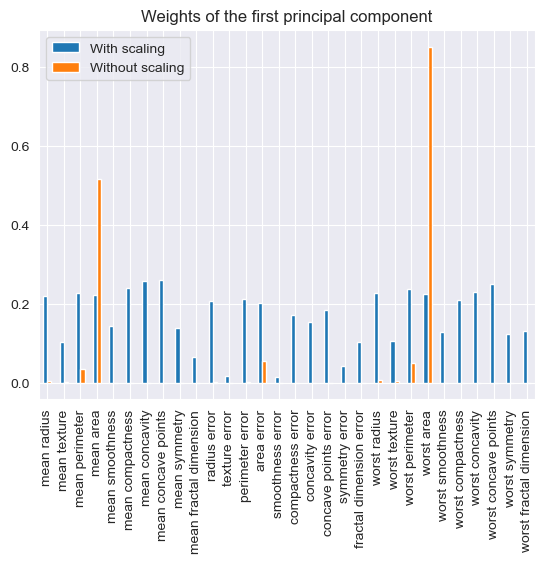

In [25]:
# Perform PCA on unscaled data
pca_unscaled = PCA(n_components=0.95)
# Calculate pca without using scaling
X_unscaled_transf = pca_unscaled.fit_transform(data)
# Convert transformed data to dataframe
pcs_names = ['PC' + str(s) for s in range(0, X_unscaled_transf.shape[1])]
data_unscaled_transf = pd.DataFrame(X_unscaled_transf, columns = pcs_names)

# Create a plot as above with the weights of each feature containing the
# weights with and without using scaling
# Add to the first_PC daraframe the components of the unscaled PCA in a column
# named "Without scaling"
first_PC["Without scaling"] = pca_unscaled.components_[0]

# Plot the weights
first_PC.plot.bar(
    title="Weights of the first principal component");

Create a plot with data before and after PCA.

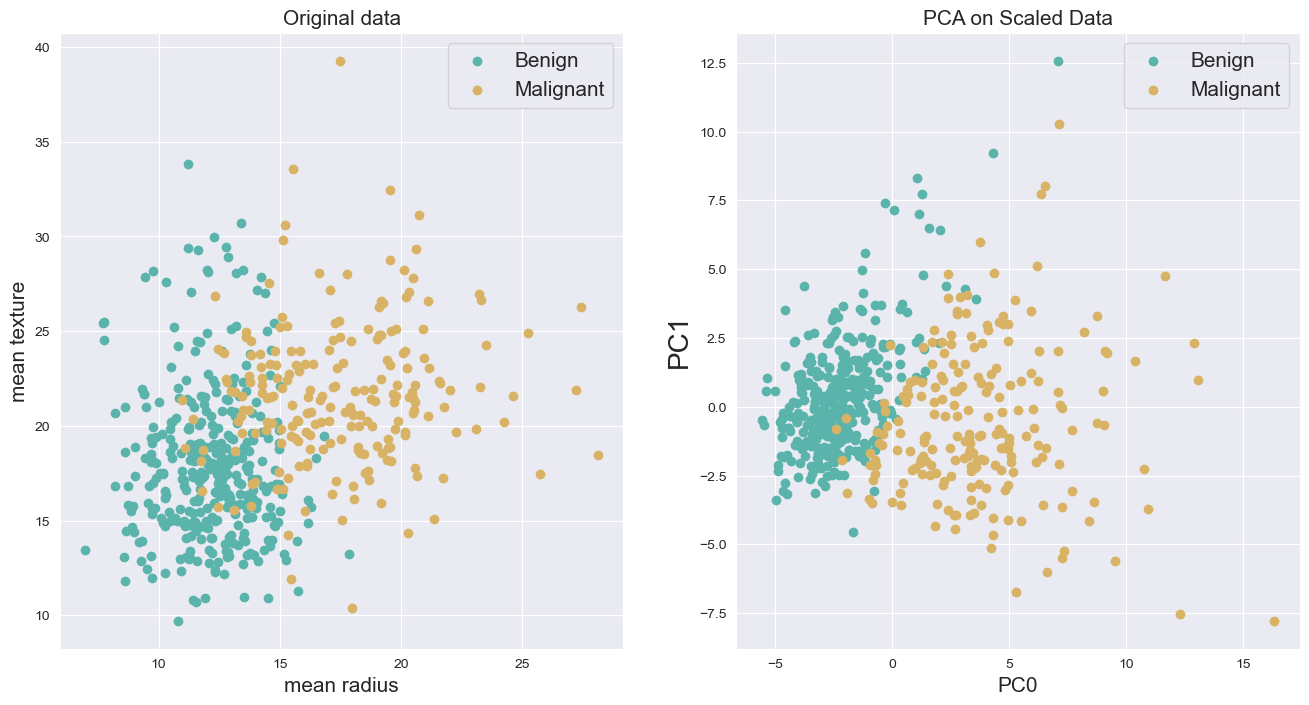

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
# Plot the data before PCA
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax1.set_title("Original data",fontsize=15)
targets = ['Benign', 'Malignant']
colors = ['#5ab4ac', '#d8b365']
for target, color in zip(targets,colors):
    indicesToKeep = y['Diagnosis'] == target
    ax1.scatter(data.loc[indicesToKeep, data.columns[0]]
               , data.loc[indicesToKeep, data.columns[1]], c = color)

ax1.set_xlabel(data.columns[0],fontsize=15)
ax1.set_ylabel(data.columns[1],fontsize=15)

ax1.legend(targets,prop={'size': 15});

# Plot the data after the transformation using scaling
# Based on https://www.datacamp.com/tutorial/principal-component-analysis-in-python
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax2.set_title("PCA on Scaled Data",fontsize=15)
for target, color in zip(targets,colors):
    indicesToKeep = y['Diagnosis'] == target
    ax2.scatter(data_scaled_transf.loc[indicesToKeep, 'PC0']
               , data_scaled_transf.loc[indicesToKeep, 'PC1'], c = color)

ax2.set_xlabel('PC0',fontsize=15)
ax2.set_ylabel('PC1',fontsize=20)

ax2.legend(targets,prop={'size': 15});


Singular Value Decomposition
==============================


Singular value decomposition shares a lot of similarities with PCA. Overall, we apply Truncated SVD or any SVD on the data matrix, whereas we apply PCA on the covariance matrix. SVD is particularly helpful with sparse data, data where many of the values are zero.


In this section, we will apply truncated SVD on the breast cancer dataset using the scikit-learn library. We will again prefer to use standardised data. Useful class: [TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)

In [31]:
# Import libraries
from sklearn.decomposition import TruncatedSVD

In [32]:
# Define the transform with 20 components to start with (default is 2)
n_components = 20;
truncated_SVD = TruncatedSVD(n_components, random_state=42)
# Apply truncated SVD
truncated_SVD.fit(X_scaled)


TruncatedSVD(n_components=20, random_state=42)

The number of components necessary to explain 95% of data variance can be estimated using the explained variance ratio and the cumulative sum of the explained variance ratio. Create a plot of the number of components versus the cumularive variance ratio.

Number of components to keep:  9


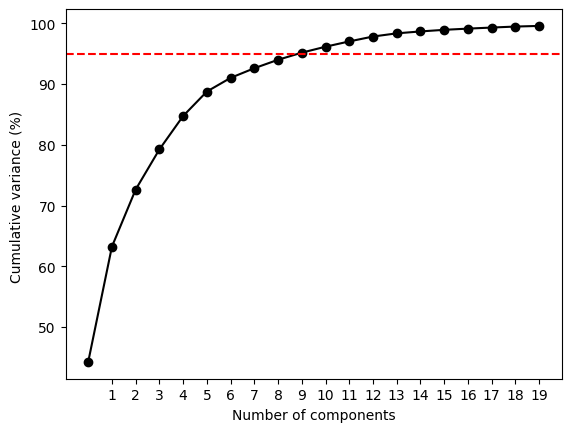

In [37]:
# Get the explained variance and calculate the cumulative sum
var_explained = truncated_SVD.explained_variance_ratio_.cumsum()
# Keep so many components as the explained variance is 95%
n_comp = np.where(var_explained >= 0.95)[0][0]
print("Number of components to keep: ", n_comp)
# Create a plot the cumulative explained variance versus the components
plt.plot(100*var_explained, marker='o', linestyle='-', color='black')
plt.xlabel('Number of components');
plt.ylabel('Cumulative variance (%) ');
plt.axhline(95, color='red', linestyle='--')
# Force integer xtick labels
plt.xticks(range(1, n_components));

Check the correlation between the new factors.

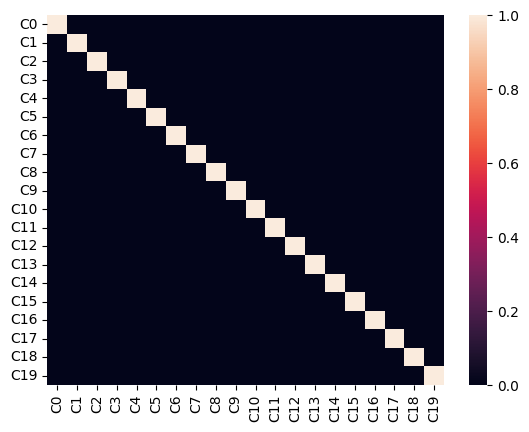

In [34]:
# Tranform the data -- we could repeat the SVD with the optimal number of features, but let's work with all components
data_SVD_transf = truncated_SVD.transform(X_scaled)

# Convert the transformed data to dataframe
data_SVD_transf = pd.DataFrame(data_SVD_transf, columns = ['C' + str(i) for i in range(0, n_components)])

#Plot heatmap
sns.heatmap(data_SVD_transf.corr(), xticklabels=True, yticklabels=True);

Linear discriminant analysis (LDA) for dimensionality reduction
===========================================================

LDA is a supervised feature extraction technique that aims to minimize the variation within class and maximize the distance between the means of the  classes. This means that the information regarding the dependent variable/target classes  will be also fed to the algorithm.


We are going to use [scikit-learn](https://scikit-learn.org/stable/index.html) and standardised data. Useful classes and methods: [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [4]:
# Import libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Perform LDA using the scaled data (X_scaled) and the output (y_array). The number of components should be (<= min(n_classes - 1, n_features)). When n_components is left to None, it will be set to min(n_classes - 1, n_features). This means that the dimension of the output is necessarily less than the number of classes, so LDA is considered a rather strong dimensionality reduction approach, and as indicated in [scikit-learn](https://scikit-learn.org/stable/modules/lda_qda.html#dimensionality-reduction-using-linear-discriminant-analysis), is better fit in a multiclass setting.

In [14]:
# Define the transform
lda = LinearDiscriminantAnalysis()
# Fit the lda model
lda.fit(X_scaled, y_array)
# Tranform the data
data_lda_transformed = lda.transform(X_scaled)
# Check the size of the new data - we should be left with only 1 feature
print("The size of the transformed data is: ", data_lda_transformed.shape)
print("The explained variance is: ", lda.explained_variance_ratio_)


The size of the transformed data is:  (569, 1)
The explained variance is:  [1.]
